# Data Exploration

In [49]:
%load_ext autoreload
%autoreload 2

import os
BASE_DIR = os.path.abspath("..")
print("Base directory: {}".format(BASE_DIR))
import sys; sys.path.insert(0, BASE_DIR)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Base directory: /home/lucas/work/ds/project/code/src


In [24]:
%matplotlib inline
import os
import utils
import librosa
import numpy as np
import pandas as pd
import seaborn as sns
import IPython.display as ipd
import matplotlib.pyplot as plt
import sklearn.utils, sklearn.preprocessing, sklearn.decomposition, sklearn.svm

dotenv_file = os.path.join(BASE_DIR, "../env/.env")
utils.loadenv(dotenv_file)
plt.rcParams['figure.figsize'] = (17, 5)


In [25]:
# Directory where mp3 are stored.
DIR_DATA = os.environ.get('DIR_DATA')
DIR_META = os.environ.get('DIR_META')

# load metadata and features.
genres = utils.load(os.path.join(DIR_META, 'genres.csv'))
features = utils.load(os.path.join(DIR_META, 'features.csv'))
echonest = utils.load(os.path.join(DIR_META, 'echonest.csv'))
tracks = utils.load(os.path.join(DIR_META, 'tracks.csv'))

np.testing.assert_array_equal(features.index, tracks.index)
assert echonest.index.isin(tracks.index).all()

tracks.shape, genres.shape, features.shape, echonest.shape

((106574, 52), (163, 4), (106574, 518), (13129, 249))

## Genre Distribution

Number of unique genres: 16


<AxesSubplot:>

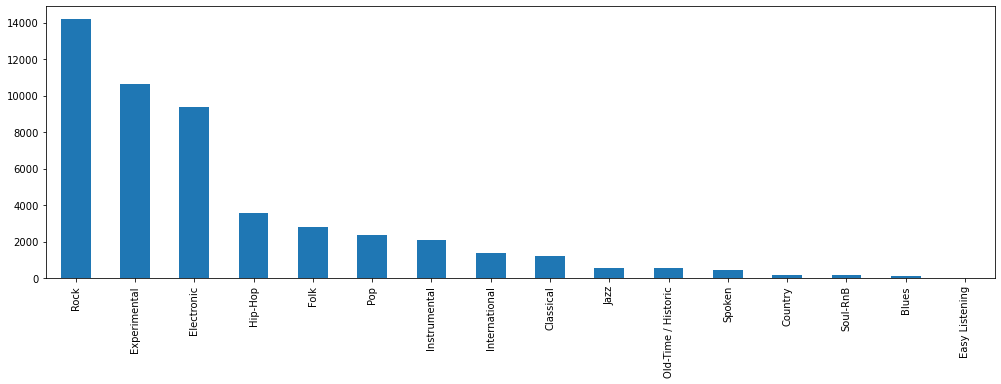

In [41]:
freqs = tracks['track']['genre_top'].value_counts()
print("Number of unique genres: {}".format(freqs.shape[0]))
freqs.plot.bar()

In [38]:
mask_multi_genre = tracks['track']['genres'].str.len() > 1
tracks['track']['genres'][mask_multi_genre].value_counts()

print(tracks['track']['genres_all'].shape)

(106574,)


### Small set only

Rock             1000
Pop              1000
International    1000
Instrumental     1000
Hip-Hop          1000
Folk             1000
Experimental     1000
Electronic       1000
Name: genre_top, dtype: int64

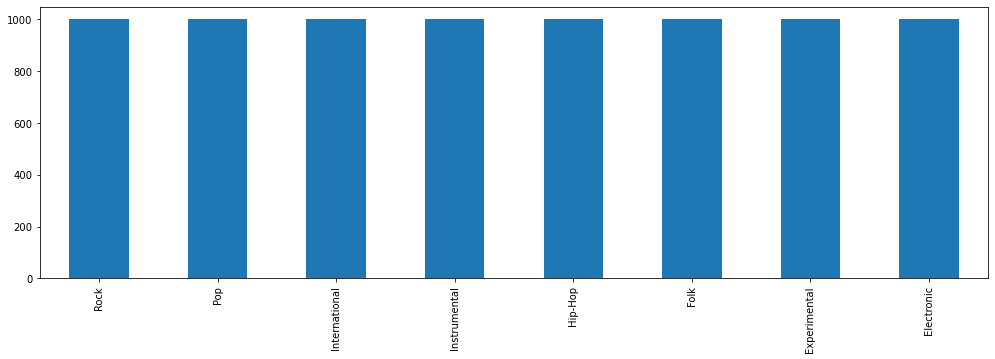

In [48]:
small = tracks[tracks['set', 'subset'] <= 'small']
freqs = small['track']['genre_top'].value_counts()
freqs = freqs[freqs > 0]    # filter out zeros
freqs.plot.bar()
freqs